In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [128]:
df = pd.read_csv('data.csv')
dataset = df.copy()

In [129]:
dataset.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [130]:
dataset.count()

Bankrupt?                                                   6819
 ROA(C) before interest and depreciation before interest    6819
 ROA(A) before interest and % after tax                     6819
 ROA(B) before interest and depreciation after tax          6819
 Operating Gross Margin                                     6819
 Realized Sales Gross Margin                                6819
 Operating Profit Rate                                      6819
 Pre-tax net Interest Rate                                  6819
 After-tax net Interest Rate                                6819
 Non-industry income and expenditure/revenue                6819
 Continuous interest rate (after tax)                       6819
 Operating Expense Rate                                     6819
 Research and development expense rate                      6819
 Cash flow rate                                             6819
 Interest-bearing debt interest rate                        6819
 Tax rate (A)            

In [131]:
dataset.isnull().sum().sum() # No null values

0

In [132]:
dataset.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
 Realized Sales Gross Margin                                float64
 Operating Profit Rate                                      float64
 Pre-tax net Interest Rate                                  float64
 After-tax net Interest Rate                                float64
 Non-industry income and expenditure/revenue                float64
 Continuous interest rate (after tax)                       float64
 Operating Expense Rate                                     float64
 Research and development expense rate                      float64
 Cash flow rate                                             float64
 Interest-bearing debt interest rate            

In [133]:
dataset.columns = ['x'+ str(x) for x in range(1, 97)]

In [134]:
dataset.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.397925,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.015463,0.378497,0.021320,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,0.022165,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.16750

In [135]:
dataset.rename(columns={'x1' : 'target'
                      }, inplace=True)

In [136]:
dataset.head()

,target,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0.391590,0.012335,0.751111,0.127236,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,0.379093,0.006562,0.092318,0.148036,0.406580,0.014993,0.001495,0.004227,6.500000e+07,2.650000e+09,0.013387,0.028997,0.381968,0.141016,0.829502,0.340201,0.602806,0.000991,0.006302,5.340000e+09,0.098162,0.336731,0.277456,0.013879,0.446027,0.742729,0.334777,0.003715,0.909903,0.002060,0.021387,1.791094e-03,1.022676e-03,0.594502,7.610000e+08,0.671571,0.276179,0.446027,0.334777,0.117922,0.642765,0.459254,0.538491,0.314515,0.025346,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.154187,0.154187,0.193722,0.321674,0.014368,0.077762,0.148603,0.022046,0.848005,0.689110,0.689110,0.217568,4.880000e+09,0.000382,0.263371,0.384077,0.004194,0.002896,0.630228,0.009572,0.151465,0.848535,0.005047,0.379743,0.005366,0.077727,0.147561,0.397925,0.089955,0.001966,0.003215,7.130000e+09,9.150000e+09,0.028065,0.015463,0.378497,0.021320,0.725754,0.161575,0.225815,0.018851,0.002961,1.010646e-03,0.098715,0.348716,0.276580,0.003540,0.615848,0.729825,0.331509,0.022165,0.906902,0.001831,0.024161,8.140000e+09,6.050000e+09,0.593889,2.030000e+09,0.671519,0.559144,0.615848,0.331509,0.120760,0.579039,0.448518,0.604105,0.302382,0.067250,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.1

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  6819 non-null   int64  
 1   x2      6819 non-null   float64
 2   x3      6819 non-null   float64
 3   x4      6819 non-null   float64
 4   x5      6819 non-null   float64
 5   x6      6819 non-null   float64
 6   x7      6819 non-null   float64
 7   x8      6819 non-null   float64
 8   x9      6819 non-null   float64
 9   x10     6819 non-null   float64
 10  x11     6819 non-null   float64
 11  x12     6819 non-null   float64
 12  x13     6819 non-null   float64
 13  x14     6819 non-null   float64
 14  x15     6819 non-null   float64
 15  x16     6819 non-null   float64
 16  x17     6819 non-null   float64
 17  x18     6819 non-null   float64
 18  x19     6819 non-null   float64
 19  x20     6819 non-null   float64
 20  x21     6819 non-null   float64
 21  x22     6819 non-null   float64
 22  

In [138]:
dataset.duplicated().sum()

0

In [139]:
dataset.target.value_counts()

0    6599
1     220
Name: target, dtype: int64

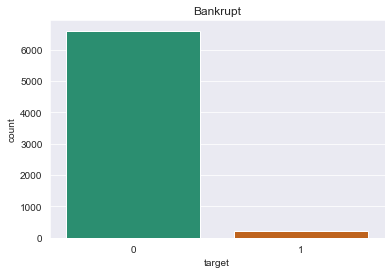

In [140]:
#count-plot of target variable
sns.set_style('darkgrid')
sns.countplot(x='target', data=dataset, palette='Dark2') 
plt.title('Bankrupt')
plt.show()

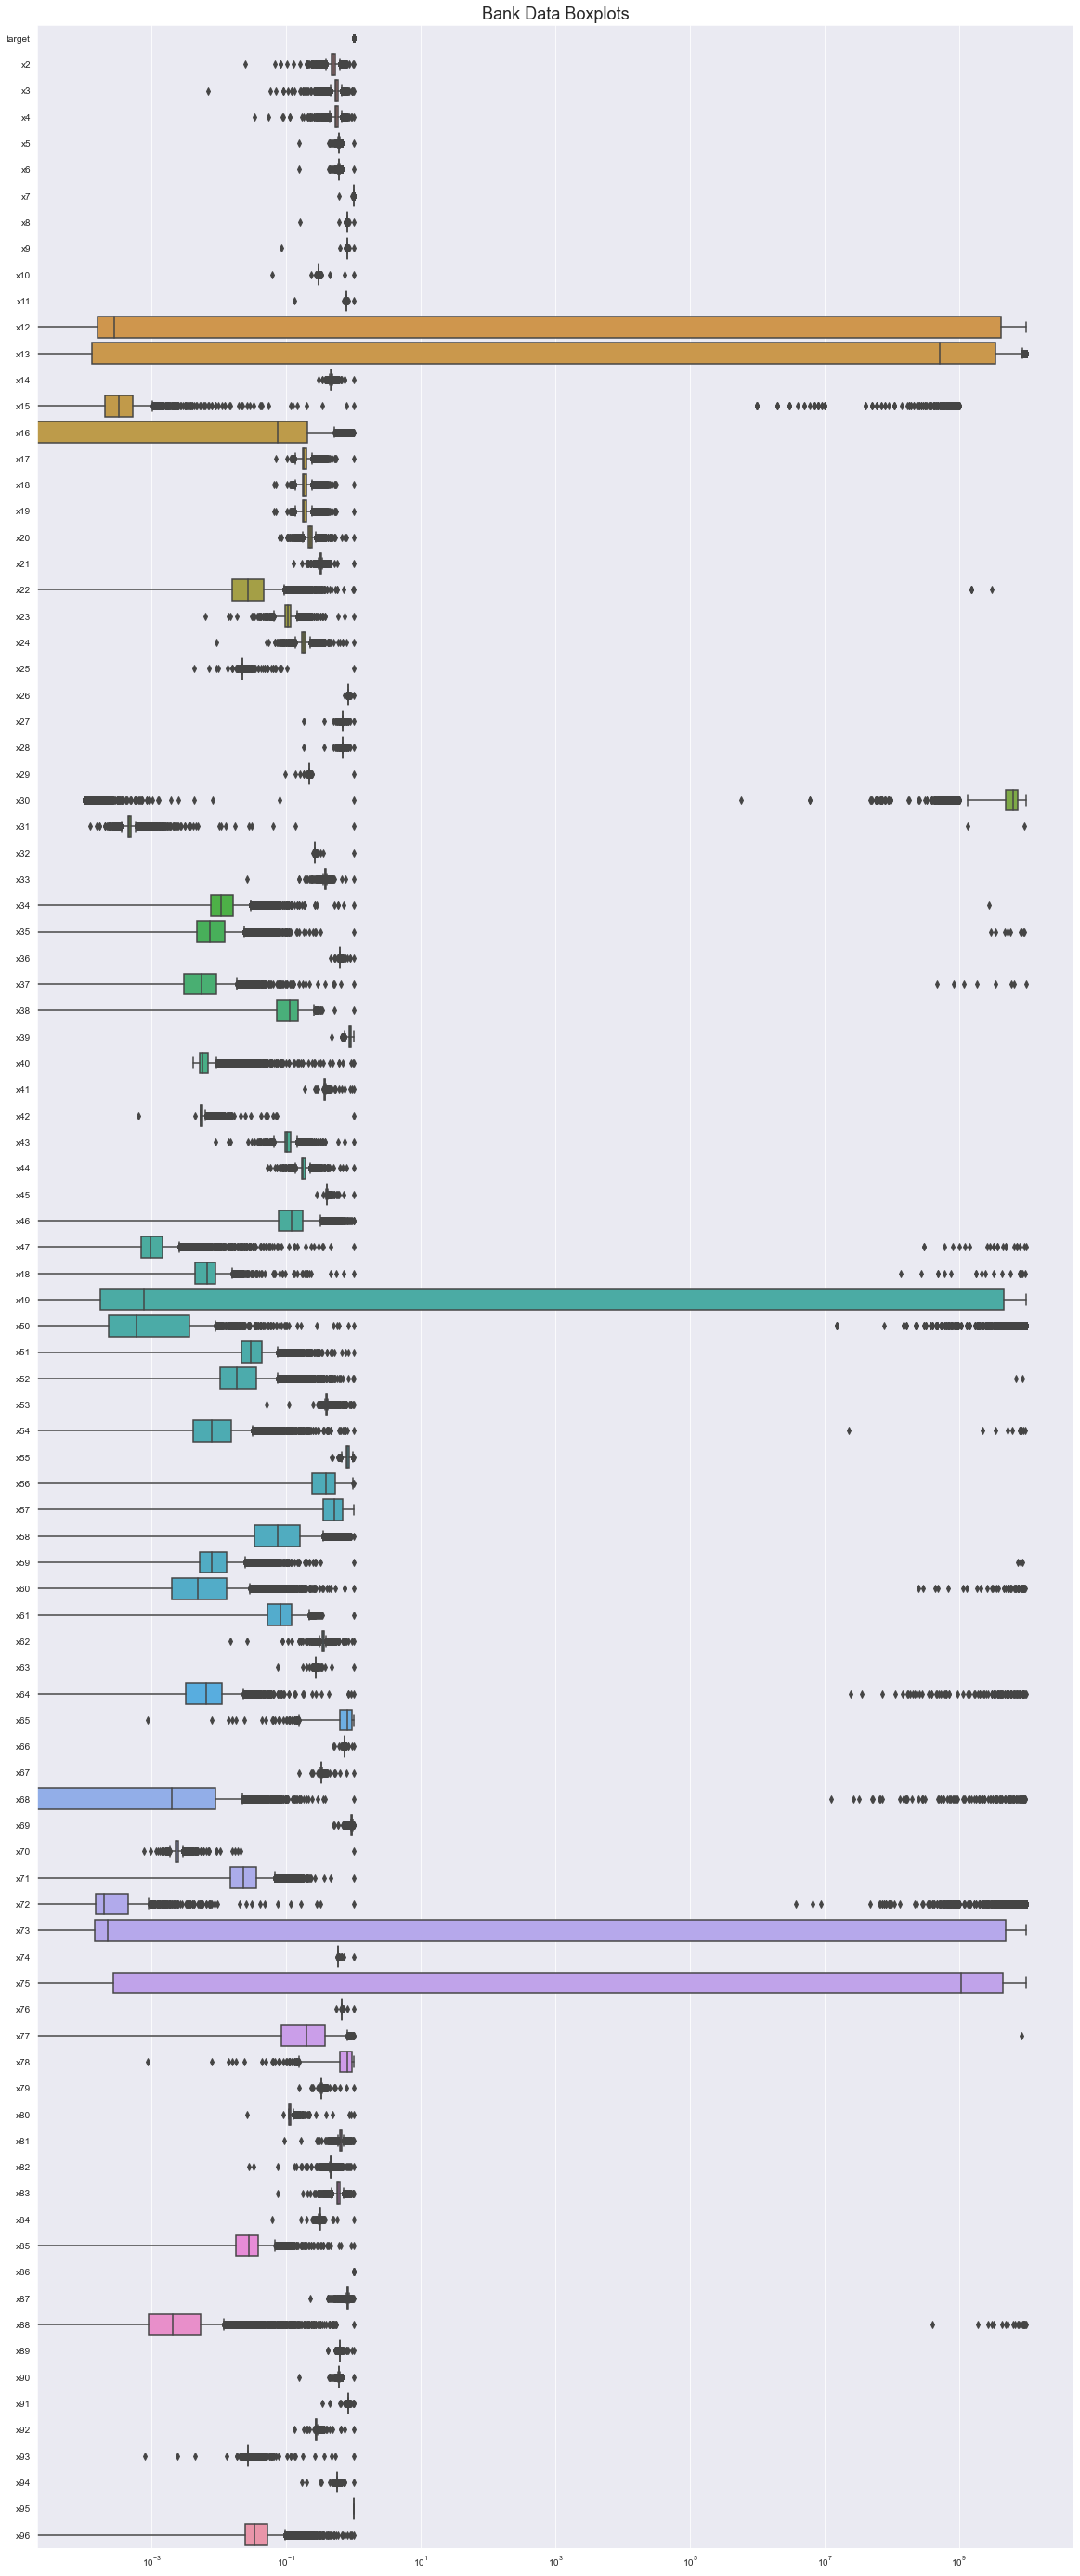

In [141]:
plt.figure(figsize = (20, 50))
ax = sns.boxplot(data = dataset, orient = 'h')
ax.set_title('Bank Data Boxplots', fontsize = 18)
ax.set(xscale = 'log')
plt.show()

In [142]:
dataset.x95.value_counts() # Net_income column value columns

1    6819
Name: x95, dtype: int64

In [143]:
dataset.drop('x95', axis=1, inplace=True) # Dropping Net_income column because it is 1 in all values

In [144]:
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, [0]]
scaler = RobustScaler()
X.iloc[:,:] = scaler.fit_transform(X)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify = y)

### Undersampling

In [146]:
undersample = NearMiss(version =1, n_neighbors =3)
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

In [147]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC(probability=True)
model4 = RandomForestClassifier()

## Bagging Classifier

In [148]:
bag = BaggingClassifier(base_estimator= model3,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 10,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [149]:
bag.fit(X_train_us, y_train_us)

C:\Users\azerh\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=SVC(probability=True), bootstrap_features=True,
                  max_features=10, max_samples=0.4, n_jobs=-1,
                  random_state=123)

In [150]:
bag_pred = bag.predict(X_test)

In [151]:
accuracy_score(y_test, bag_pred)

0.7526881720430108

In [152]:
print("Classification Report for Bagging Classifier:""\n",classification_report(y_test, bag_pred))

Classification Report for Bagging Classifier:
               precision    recall  f1-score   support

           0       0.99      0.75      0.85      1980
           1       0.10      0.86      0.18        66

    accuracy                           0.75      2046
   macro avg       0.55      0.81      0.52      2046
weighted avg       0.97      0.75      0.83      2046



## Boosting Classifiers

### Gradient Boosting Classifier

In [153]:
gbm = GradientBoostingClassifier(random_state = 123)

In [154]:
gbm.fit(X_train_us, y_train_us)

C:\Users\azerh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=123)

In [155]:
gbm_pred = gbm.predict(X_test)

In [156]:
accuracy_score(y_test, gbm_pred)

0.5933528836754643

In [157]:
print("Classification Report for GradientBoosting Classifier:""\n",classification_report(y_test, gbm_pred))

Classification Report for GradientBoosting Classifier:
               precision    recall  f1-score   support

           0       1.00      0.58      0.73      1980
           1       0.07      0.98      0.14        66

    accuracy                           0.59      2046
   macro avg       0.54      0.78      0.43      2046
weighted avg       0.97      0.59      0.71      2046



### XGBoost Classifier

In [158]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimators = 10,
             random_state = 123)

In [159]:
xgbt.fit(X_train_us, y_train_us)

[15:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimarors=10,
              n_estimators=100, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [160]:
xgbt_pred = xgbt.predict(X_test)

In [161]:
accuracy_score(y_test, xgbt_pred)

0.6290322580645161

In [162]:
print("Classification Report for XGBoost Classifier:""\n",classification_report(y_test, xgbt_pred))

Classification Report for XGBoost Classifier:
               precision    recall  f1-score   support

           0       1.00      0.62      0.76      1980
           1       0.08      0.98      0.15        66

    accuracy                           0.63      2046
   macro avg       0.54      0.80      0.45      2046
weighted avg       0.97      0.63      0.74      2046



### LightGBM

In [163]:
lgbm = LGBMClassifier()

In [164]:
lgbm.fit(X_train_us, y_train_us)

C:\Users\azerh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\azerh\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier()

In [165]:
lgbm_pred = lgbm.predict(X_test)

In [166]:
accuracy_score(y_test, lgbm_pred)

0.6182795698924731

In [167]:
print("Classification Report for LightGBM Classifier:""\n",classification_report(y_test, lgbm_pred))

Classification Report for LightGBM Classifier:
               precision    recall  f1-score   support

           0       1.00      0.61      0.75      1980
           1       0.08      0.98      0.14        66

    accuracy                           0.62      2046
   macro avg       0.54      0.80      0.45      2046
weighted avg       0.97      0.62      0.73      2046



### Oversampling

In [168]:
ros = RandomOverSampler(random_state = 0)
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [169]:
y_train_os.value_counts()

target
0         4619
1         4619
dtype: int64

## Bagging Classifier

In [170]:
bag = BaggingClassifier(base_estimator= model3,
                 n_estimators = 10,
                 max_samples = 0.4,
                 max_features = 35,
                 bootstrap = True,
                 bootstrap_features = True,
                 n_jobs = -1,
                 random_state = 123)

In [171]:
bag.fit(X_train_os, y_train_os)

C:\Users\azerh\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=SVC(probability=True), bootstrap_features=True,
                  max_features=35, max_samples=0.4, n_jobs=-1,
                  random_state=123)

In [172]:
bag_pred = bag.predict(X_test)

In [173]:
print("Classification Report for Bagging Classifier:""\n",classification_report(y_test, bag_pred))

Classification Report for Bagging Classifier:
               precision    recall  f1-score   support

           0       0.97      0.79      0.87      1980
           1       0.05      0.36      0.09        66

    accuracy                           0.78      2046
   macro avg       0.51      0.58      0.48      2046
weighted avg       0.94      0.78      0.85      2046



 ### Gradient Boosting Classifier

In [174]:
gbm = GradientBoostingClassifier(random_state = 123)
gbm.fit(X_train_os, y_train_os)
gbm_pred = gbm.predict(X_test)
print("Classification Report for GradientBoosting Classifier:""\n",classification_report(y_test, gbm_pred))

C:\Users\azerh\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report for GradientBoosting Classifier:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      1980
           1       0.31      0.65      0.42        66

    accuracy                           0.94      2046
   macro avg       0.65      0.80      0.70      2046
weighted avg       0.97      0.94      0.95      2046



### XGBoost Classifier

In [175]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)
xgbt.fit(X_train_os, y_train_os)
xgbt_pred = xgbt.predict(X_test)
print("Classification Report for XGBoost Classifier:""\n",classification_report(y_test, xgbt_pred))

[15:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Classification Report for XGBoost Classifier:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      1980
           1       0.29      0.68      0.40        66

    accuracy                           0.93      2046
   macro avg       0.64      0.81      0.68      2046
weighted avg       0.97      0.93      0.95      2046



### CatBoost Classifier

In [176]:
cb = CatBoostClassifier()
cb.fit(X_train_os, y_train_os)
cb_pred = cb.predict(X_test)

Learning rate set to 0.026622
0:	learn: 0.6605159	total: 24.8ms	remaining: 24.8s
1:	learn: 0.6330474	total: 47ms	remaining: 23.4s
2:	learn: 0.6073484	total: 68.6ms	remaining: 22.8s
3:	learn: 0.5820355	total: 90.4ms	remaining: 22.5s
4:	learn: 0.5609181	total: 112ms	remaining: 22.3s
5:	learn: 0.5319536	total: 142ms	remaining: 23.6s
6:	learn: 0.5140575	total: 166ms	remaining: 23.6s
7:	learn: 0.4962146	total: 190ms	remaining: 23.5s
8:	learn: 0.4801692	total: 218ms	remaining: 24s
9:	learn: 0.4654328	total: 242ms	remaining: 24s
10:	learn: 0.4499297	total: 264ms	remaining: 23.8s
11:	learn: 0.4336797	total: 286ms	remaining: 23.6s
12:	learn: 0.4169843	total: 308ms	remaining: 23.4s
13:	learn: 0.4060787	total: 330ms	remaining: 23.2s
14:	learn: 0.3878994	total: 358ms	remaining: 23.5s
15:	learn: 0.3754009	total: 381ms	remaining: 23.4s
16:	learn: 0.3633376	total: 404ms	remaining: 23.3s
17:	learn: 0.3521878	total: 432ms	remaining: 23.6s
18:	learn: 0.3425616	total: 455ms	remaining: 23.5s
19:	learn: 0.

160:	learn: 0.0804529	total: 4.05s	remaining: 21.1s
161:	learn: 0.0800217	total: 4.07s	remaining: 21.1s
162:	learn: 0.0797417	total: 4.09s	remaining: 21s
163:	learn: 0.0793382	total: 4.12s	remaining: 21s
164:	learn: 0.0789222	total: 4.14s	remaining: 21s
165:	learn: 0.0785496	total: 4.17s	remaining: 20.9s
166:	learn: 0.0781844	total: 4.19s	remaining: 20.9s
167:	learn: 0.0779448	total: 4.21s	remaining: 20.9s
168:	learn: 0.0771290	total: 4.23s	remaining: 20.8s
169:	learn: 0.0767995	total: 4.26s	remaining: 20.8s
170:	learn: 0.0765753	total: 4.28s	remaining: 20.8s
171:	learn: 0.0762423	total: 4.3s	remaining: 20.7s
172:	learn: 0.0758233	total: 4.33s	remaining: 20.7s
173:	learn: 0.0753651	total: 4.35s	remaining: 20.7s
174:	learn: 0.0749974	total: 4.38s	remaining: 20.6s
175:	learn: 0.0745183	total: 4.4s	remaining: 20.6s
176:	learn: 0.0738820	total: 4.42s	remaining: 20.6s
177:	learn: 0.0736304	total: 4.45s	remaining: 20.5s
178:	learn: 0.0730565	total: 4.47s	remaining: 20.5s
179:	learn: 0.072857

321:	learn: 0.0378589	total: 7.94s	remaining: 16.7s
322:	learn: 0.0376869	total: 7.96s	remaining: 16.7s
323:	learn: 0.0375505	total: 7.99s	remaining: 16.7s
324:	learn: 0.0374468	total: 8.01s	remaining: 16.6s
325:	learn: 0.0372068	total: 8.03s	remaining: 16.6s
326:	learn: 0.0371348	total: 8.06s	remaining: 16.6s
327:	learn: 0.0370055	total: 8.08s	remaining: 16.6s
328:	learn: 0.0368933	total: 8.1s	remaining: 16.5s
329:	learn: 0.0367817	total: 8.12s	remaining: 16.5s
330:	learn: 0.0365953	total: 8.15s	remaining: 16.5s
331:	learn: 0.0364629	total: 8.17s	remaining: 16.4s
332:	learn: 0.0363192	total: 8.2s	remaining: 16.4s
333:	learn: 0.0361460	total: 8.22s	remaining: 16.4s
334:	learn: 0.0360239	total: 8.24s	remaining: 16.4s
335:	learn: 0.0356953	total: 8.27s	remaining: 16.3s
336:	learn: 0.0355352	total: 8.29s	remaining: 16.3s
337:	learn: 0.0352495	total: 8.31s	remaining: 16.3s
338:	learn: 0.0350111	total: 8.33s	remaining: 16.3s
339:	learn: 0.0349123	total: 8.36s	remaining: 16.2s
340:	learn: 0.

483:	learn: 0.0196528	total: 11.7s	remaining: 12.5s
484:	learn: 0.0195591	total: 11.7s	remaining: 12.4s
485:	learn: 0.0194903	total: 11.7s	remaining: 12.4s
486:	learn: 0.0194258	total: 11.8s	remaining: 12.4s
487:	learn: 0.0193888	total: 11.8s	remaining: 12.4s
488:	learn: 0.0193319	total: 11.8s	remaining: 12.3s
489:	learn: 0.0192251	total: 11.8s	remaining: 12.3s
490:	learn: 0.0191174	total: 11.9s	remaining: 12.3s
491:	learn: 0.0190525	total: 11.9s	remaining: 12.3s
492:	learn: 0.0189871	total: 11.9s	remaining: 12.2s
493:	learn: 0.0189132	total: 11.9s	remaining: 12.2s
494:	learn: 0.0188125	total: 12s	remaining: 12.2s
495:	learn: 0.0187540	total: 12s	remaining: 12.2s
496:	learn: 0.0185949	total: 12s	remaining: 12.1s
497:	learn: 0.0185815	total: 12s	remaining: 12.1s
498:	learn: 0.0184837	total: 12s	remaining: 12.1s
499:	learn: 0.0184480	total: 12.1s	remaining: 12.1s
500:	learn: 0.0183943	total: 12.1s	remaining: 12s
501:	learn: 0.0183659	total: 12.1s	remaining: 12s
502:	learn: 0.0183178	tota

645:	learn: 0.0113172	total: 15.5s	remaining: 8.51s
646:	learn: 0.0112391	total: 15.6s	remaining: 8.49s
647:	learn: 0.0112244	total: 15.6s	remaining: 8.46s
648:	learn: 0.0111795	total: 15.6s	remaining: 8.44s
649:	learn: 0.0111544	total: 15.6s	remaining: 8.41s
650:	learn: 0.0111368	total: 15.6s	remaining: 8.39s
651:	learn: 0.0111231	total: 15.7s	remaining: 8.36s
652:	learn: 0.0110532	total: 15.7s	remaining: 8.34s
653:	learn: 0.0110040	total: 15.7s	remaining: 8.31s
654:	learn: 0.0109791	total: 15.7s	remaining: 8.29s
655:	learn: 0.0109405	total: 15.8s	remaining: 8.26s
656:	learn: 0.0109184	total: 15.8s	remaining: 8.24s
657:	learn: 0.0109019	total: 15.8s	remaining: 8.21s
658:	learn: 0.0108747	total: 15.8s	remaining: 8.19s
659:	learn: 0.0108584	total: 15.8s	remaining: 8.16s
660:	learn: 0.0108412	total: 15.9s	remaining: 8.14s
661:	learn: 0.0108273	total: 15.9s	remaining: 8.11s
662:	learn: 0.0107701	total: 15.9s	remaining: 8.09s
663:	learn: 0.0107198	total: 15.9s	remaining: 8.06s
664:	learn: 

807:	learn: 0.0071961	total: 19.3s	remaining: 4.58s
808:	learn: 0.0071845	total: 19.3s	remaining: 4.56s
809:	learn: 0.0071652	total: 19.3s	remaining: 4.54s
810:	learn: 0.0071393	total: 19.4s	remaining: 4.51s
811:	learn: 0.0071264	total: 19.4s	remaining: 4.49s
812:	learn: 0.0071153	total: 19.4s	remaining: 4.46s
813:	learn: 0.0071096	total: 19.4s	remaining: 4.44s
814:	learn: 0.0070893	total: 19.5s	remaining: 4.42s
815:	learn: 0.0070793	total: 19.5s	remaining: 4.39s
816:	learn: 0.0070613	total: 19.5s	remaining: 4.37s
817:	learn: 0.0070322	total: 19.5s	remaining: 4.34s
818:	learn: 0.0070046	total: 19.5s	remaining: 4.32s
819:	learn: 0.0069854	total: 19.6s	remaining: 4.29s
820:	learn: 0.0069693	total: 19.6s	remaining: 4.27s
821:	learn: 0.0069428	total: 19.6s	remaining: 4.25s
822:	learn: 0.0069274	total: 19.6s	remaining: 4.22s
823:	learn: 0.0069181	total: 19.7s	remaining: 4.2s
824:	learn: 0.0069123	total: 19.7s	remaining: 4.17s
825:	learn: 0.0068867	total: 19.7s	remaining: 4.15s
826:	learn: 0

968:	learn: 0.0051423	total: 23s	remaining: 735ms
969:	learn: 0.0051423	total: 23s	remaining: 712ms
970:	learn: 0.0051319	total: 23s	remaining: 688ms
971:	learn: 0.0051275	total: 23.1s	remaining: 664ms
972:	learn: 0.0051099	total: 23.1s	remaining: 640ms
973:	learn: 0.0051019	total: 23.1s	remaining: 617ms
974:	learn: 0.0050944	total: 23.1s	remaining: 593ms
975:	learn: 0.0050843	total: 23.1s	remaining: 569ms
976:	learn: 0.0050760	total: 23.2s	remaining: 545ms
977:	learn: 0.0050715	total: 23.2s	remaining: 522ms
978:	learn: 0.0050566	total: 23.2s	remaining: 498ms
979:	learn: 0.0050491	total: 23.2s	remaining: 474ms
980:	learn: 0.0050383	total: 23.3s	remaining: 451ms
981:	learn: 0.0050240	total: 23.3s	remaining: 427ms
982:	learn: 0.0050034	total: 23.3s	remaining: 403ms
983:	learn: 0.0049931	total: 23.3s	remaining: 380ms
984:	learn: 0.0049845	total: 23.4s	remaining: 356ms
985:	learn: 0.0049808	total: 23.4s	remaining: 332ms
986:	learn: 0.0049750	total: 23.4s	remaining: 308ms
987:	learn: 0.0049

In [177]:
print("Classification Report for CatBoost Classifier:""\n",classification_report(y_test, cb_pred))

Classification Report for CatBoost Classifier:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1980
           1       0.48      0.41      0.44        66

    accuracy                           0.97      2046
   macro avg       0.73      0.70      0.71      2046
weighted avg       0.96      0.97      0.97      2046

